## Анализ бизнес-показателей

**Нужно проанализировать бизнес показатели  развлекательного приложения Procrastinate Pro+, что бы разобраться в причинах, по которым последние несколько месяцев компания терпит убытки, несмотря на огромные вложения в рекламу и помочь компании выйти в плюс. 
Предоставлены данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года.**

   **Цель исследования:**
       
    • Выделить причины неэффективности привлечения пользователей.
    • Сформулировать рекомендации для отдела маркетинга.

**Ход исследования**
1.	Загрузить данные и подготовить их к анализу
2.	Задать функции для расчёта и анализа LTV, ROI, удержания и конверсии 
3.	Исследовательский анализ данных
4.	Маркетинг
5.	Оценить окупаемость рекламы
6.	Написать выводы и рекомендации


### Загрузите данные и подготовьте их к анализу

Загрузите данные о визитах, заказах и рекламных расходах из CSV-файлов в переменные.

**Пути к файлам**

- визиты: `/datasets/visits_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/visits_info_short.csv);
- заказы: `/datasets/orders_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/orders_info_short.csv);
- расходы: `/datasets/costs_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/costs_info_short.csv).

Изучите данные и выполните предобработку. Есть ли в данных пропуски и дубликаты? Убедитесь, что типы данных во всех колонках соответствуют сохранённым в них значениям. Обратите внимание на столбцы с датой и временем.

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
try:
    visits, orders, costs = (
    pd.read_csv('/datasets/visits_info_short.csv'),  
    pd.read_csv('/datasets/orders_info_short.csv'), 
    pd.read_csv('/datasets/costs_info_short.csv'), 
    
)
except:
    visits, orders, costs = (
    pd.read_csv('https://code.s3.yandex.net/datasets/visits_info_short.csv'),  
    pd.read_csv('https://code.s3.yandex.net/datasets/orders_info_short.csv'), 
    pd.read_csv('https://code.s3.yandex.net/datasets/costs_info_short.csv'),
    )

**Проверим, есть ли в данных пропуски и дубликаты**

In [3]:
visits.head()

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


In [4]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


In [5]:
visits.duplicated().sum()

0

In [6]:
orders.head()

,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


In [7]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


In [8]:
orders.duplicated().sum()

0

In [9]:
costs.head()

,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


In [10]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


In [11]:
costs.duplicated().sum()

0

**Нужно изменить тип данный в столбцах**

* User Id - приведем к строчному типу
* Session End, Session Start, Event Dt, dt  - к типу дата

**Приведем название столбцов к единому виду в нижнем регистре**

In [12]:
visits.columns = [c.lower().replace(' ', '_') for c in visits.columns]
orders.columns = [c.lower().replace(' ', '_') for c in orders.columns]
costs.columns = [c.lower() for c in costs.columns]


In [13]:
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
costs['dt'] = pd.to_datetime(costs['dt']).dt.date


In [14]:
visits['user_id'] = visits['user_id'].astype(str)
orders['user_id'] = orders['user_id'].astype(str)


 Провела первичный осмотр, привела столбцы к нужному формату snake_case, проанализировала наличие пропусков и дубликатов в датасете, привела время к подходящему типу данных.

### Задайте функции для расчёта и анализа LTV, ROI, удержания и конверсии.

Разрешается использовать функции, с которыми вы познакомились в теоретических уроках.

Это функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

А также функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

__Функция для отбора пользователей по критериям__ 

In [15]:
def get_profiles(sessions, orders, ad_costs):
 
    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )
 
    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')
 
    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())
 
  
 
    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )
 
    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')
 
    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']
 
    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )
 
    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)
 
    return profiles

__функция для расчёта удержания__

In [43]:


def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time  

__функция для расчёта конверсии__

In [44]:


def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

__функция для расчёта LTV и ROI__

In [45]:


def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    ) 

__функция для сглаживания фрейма__

In [46]:


def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

__функция для визуализации удержания__

In [47]:


def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show() 

__функция для визуализации конверсии__

In [48]:


def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

__функция для визуализации LTV и ROI__

In [50]:


def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

### Исследовательский анализ данных

- Составьте профили пользователей. Определите минимальную и максимальную даты привлечения пользователей.
- Выясните, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих из каждой страны.
- Узнайте, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого устройства.
- Изучите рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

После каждого пункта сформулируйте выводы.

In [23]:
profiles = get_profiles(visits, orders, costs)
profiles.head(5)

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,100002830880,2019-10-17 12:25:34,organic,Android,United States,2019-10-17,2019-10-01,False,0.000000
1,10000484057,2019-06-29 20:23:14,lambdaMediaAds,Mac,Germany,2019-06-29,2019-06-01,False,0.700000
2,100010021210,2019-07-19 15:29:29,LeapBob,PC,UK,2019-07-19,2019-07-01,False,0.215122
3,100018706745,2019-10-16 16:19:26,TipTop,Mac,United States,2019-10-16,2019-10-01,False,3.500000
4,100024199374,2019-08-20 15:46:46,organic,Android,United States,2019-08-20,2019-08-01,False,0.000000


In [24]:
min_analysis_date = profiles['dt'].min()
max_analysis_date =  profiles['dt'].max()
f"Минимальная дата привлечения пользователей:{min_analysis_date} Максимальня дата привлечения  пользователей {max_analysis_date}"

'Минимальная дата привлечения пользователей:2019-05-01 Максимальня дата привлечения  пользователей 2019-10-27'

In [25]:
users_by_region = profiles.groupby('region').agg({'user_id': 'nunique','payer': 'sum'}) \
.sort_values(by='payer',ascending=False)
users_by_region['percent'] = round(users_by_region['payer'] / users_by_region['user_id'] * 100,2)
users_by_region

,user_id,payer,percent
region,,,
United States,100002,6902,6.90
UK,17575,700,3.98
France,17450,663,3.80
Germany,14981,616,4.11


**В приложение приходят пользователи из 4- х стран. США, Англия, Франция и Германия.
Больше всего пользователей из США. Платящих пользователей из США 6,9%. Остальные страны имеют всего 4% платящих пользователей.**


Причем даже если суммарно сложить всех пользователей (в том числе и платящих) прочих стран мы едва получим половину от всех пользователей Штатов, при этом и доля покупателей у Америки самая высокая с отрывом

In [26]:
users_by_device = profiles.groupby('device').agg({'user_id': 'nunique','payer': 'sum'}) \
.sort_values(by='payer',ascending=False)
users_by_device['percent'] = round(users_by_device['payer'] / users_by_device['user_id'] * 100,2)
users_by_device

,user_id,payer,percent
device,,,
iPhone,54479,3382,6.21
Android,35032,2050,5.85
Mac,30042,1912,6.36
PC,30455,1537,5.05


**Больше всего пользователей заходят в приложение с iPhone и меньше всего с PC. Платящих пользователей с iPhone 6.21%. Платящих пользователей с РС в два раза меньше чем с iPhone, около 5.05%**

In [27]:
users_by_channel = profiles.groupby('channel').agg({'user_id': 'nunique','payer': 'sum'}) \
.sort_values(by='payer',ascending=False)
users_by_channel['percent'] = round(users_by_channel['payer'] / users_by_channel['user_id'] * 100,2)
users_by_channel

,user_id,payer,percent
channel,,,
FaceBoom,29144,3557,12.20
TipTop,19561,1878,9.60
organic,56439,1160,2.06
WahooNetBanner,8553,453,5.30
AdNonSense,3880,440,11.34
RocketSuperAds,4448,352,7.91
LeapBob,8553,262,3.06
OppleCreativeMedia,8605,233,2.71
lambdaMediaAds,2149,225,10.47


**Больше всего платящих пользователей приходит с канала FaceBoom 12.2%, AdNonSense приносит 11.34% платящих пользователей и канал lambdaMediaAds приносит 10.47% покупателей.**


### Маркетинг

- Посчитайте общую сумму расходов на маркетинг.
- Выясните, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.
- Постройте визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику. Постарайтесь отразить это на одном графике.
- Узнайте, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используйте профили пользователей.

Напишите промежуточные выводы.

**Общяя сумма расходов на маркетинг:105497**

In [28]:
total_costs = round(costs['costs'].sum())
f"Общяя сумма расходов на маркетинг:{total_costs}"

'Общяя сумма расходов на маркетинг:105497'

*Сколько денег потратили на каждый источник привлечения*

In [29]:
cost_per_channel = costs.groupby('channel').agg({'costs': 'sum'}) \
.sort_values(by='costs',ascending=False)
cost_per_channel['payer'] = profiles.groupby('channel').agg({'payer': 'sum'}) \
.sort_values(by='payer',ascending=False)
cost_per_channel['percent'] = round(cost_per_channel['costs'] / total_costs * 100,2)
cost_per_channel

,costs,payer,percent
channel,,,
TipTop,54751.30,1878,51.90
FaceBoom,32445.60,3557,30.75
WahooNetBanner,5151.00,453,4.88
AdNonSense,3911.25,440,3.71
OppleCreativeMedia,2151.25,233,2.04
RocketSuperAds,1833.00,352,1.74
LeapBob,1797.60,262,1.70
lambdaMediaAds,1557.60,225,1.48
MediaTornado,954.48,156,0.90


**Половина всех расходов на привлечение потратили на канал TipTop, почти 52%. На канал FaceBoom ушло 31%. На остальные каналы потратили не более 5%** 

Постройте визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику. Постарайтесь отразить это на одном графике.

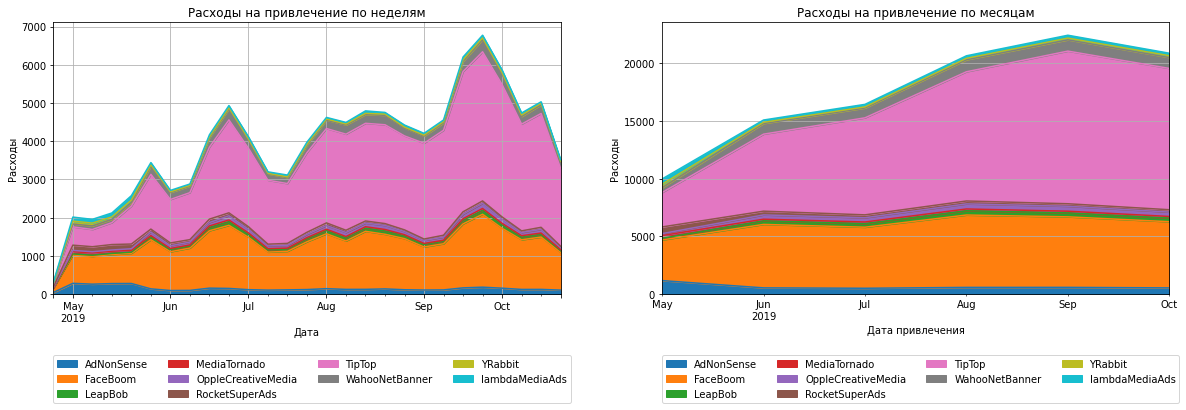

In [30]:
costs['month'] = costs['dt'].astype('datetime64[M]') 
costs['week'] = costs['dt'].astype('datetime64[W]')  
ax = costs.pivot_table(
    index='week', columns='channel', values='costs', aggfunc='sum'
).plot.area (grid=True, figsize=(20, 5),ax=plt.subplot(1, 2, 1))
plt.xlabel('Дата')
plt.ylabel('Расходы')
plt.title('Расходы на привлечение по неделям')
plt.legend(ncol=4, bbox_to_anchor=(0, -0.4), loc='lower left', borderaxespad=0)
ax1 = costs.pivot_table(
    index='month', columns='channel', values='costs', aggfunc='sum'
).plot.area (grid=True, figsize=(20, 5),ax=plt.subplot(1, 2, 2))
plt.xlabel('Дата привлечения')
plt.ylabel('Расходы')
plt.title('Расходы на привлечение по месяцам')
plt.legend(ncol=4, bbox_to_anchor=(0, -0.4), loc='lower left', borderaxespad=0)
plt.show()

**На графике с разбивкой по неделям, видны скачки роста расходов на привлечение, они совпадают на двух самых дорогих каналах. По графику с разбивкой по месяцам видна динамика роста расходов на канале TipTop.**

Узнайте, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используйте профили пользователей.

In [31]:
cac_mean = profiles.groupby('channel').agg(users = ('user_id', 'nunique'),payers = ('payer', 'sum'),payers_share = ('payer', 'mean'),mean_CAC = ('acquisition_cost', 'mean')).sort_values(by = 'mean_CAC', ascending = False).reset_index()

cac_mean

,channel,users,payers,payers_share,mean_CAC
0,TipTop,19561,1878,0.096007,2.799003
1,FaceBoom,29144,3557,0.122049,1.113286
2,AdNonSense,3880,440,0.113402,1.008054
3,lambdaMediaAds,2149,225,0.104700,0.724802
4,WahooNetBanner,8553,453,0.052964,0.602245
5,RocketSuperAds,4448,352,0.079137,0.412095
6,OppleCreativeMedia,8605,233,0.027077,0.250000
7,YRabbit,4312,165,0.038265,0.218975
8,MediaTornado,4364,156,0.035747,0.218717
9,LeapBob,8553,262,0.030633,0.210172


**Дороже всего привлечение одного пользователя на канале TipTop 2,8**

### Оцените окупаемость рекламы

Используя графики LTV, ROI и CAC, проанализируйте окупаемость рекламы. Считайте, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. Необходимость включения в анализ органических пользователей определите самостоятельно.

- Проанализируйте окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проверьте конверсию пользователей и динамику её изменения. То же самое сделайте с удержанием пользователей. Постройте и изучите графики конверсии и удержания.
- Проанализируйте окупаемость рекламы с разбивкой по устройствам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по странам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Ответьте на такие вопросы:
    - Окупается ли реклама, направленная на привлечение пользователей в целом?
    - Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
    - Чем могут быть вызваны проблемы окупаемости?

Напишите вывод, опишите возможные причины обнаруженных проблем и промежуточные рекомендации для рекламного отдела.

*Проанализируйте окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.*

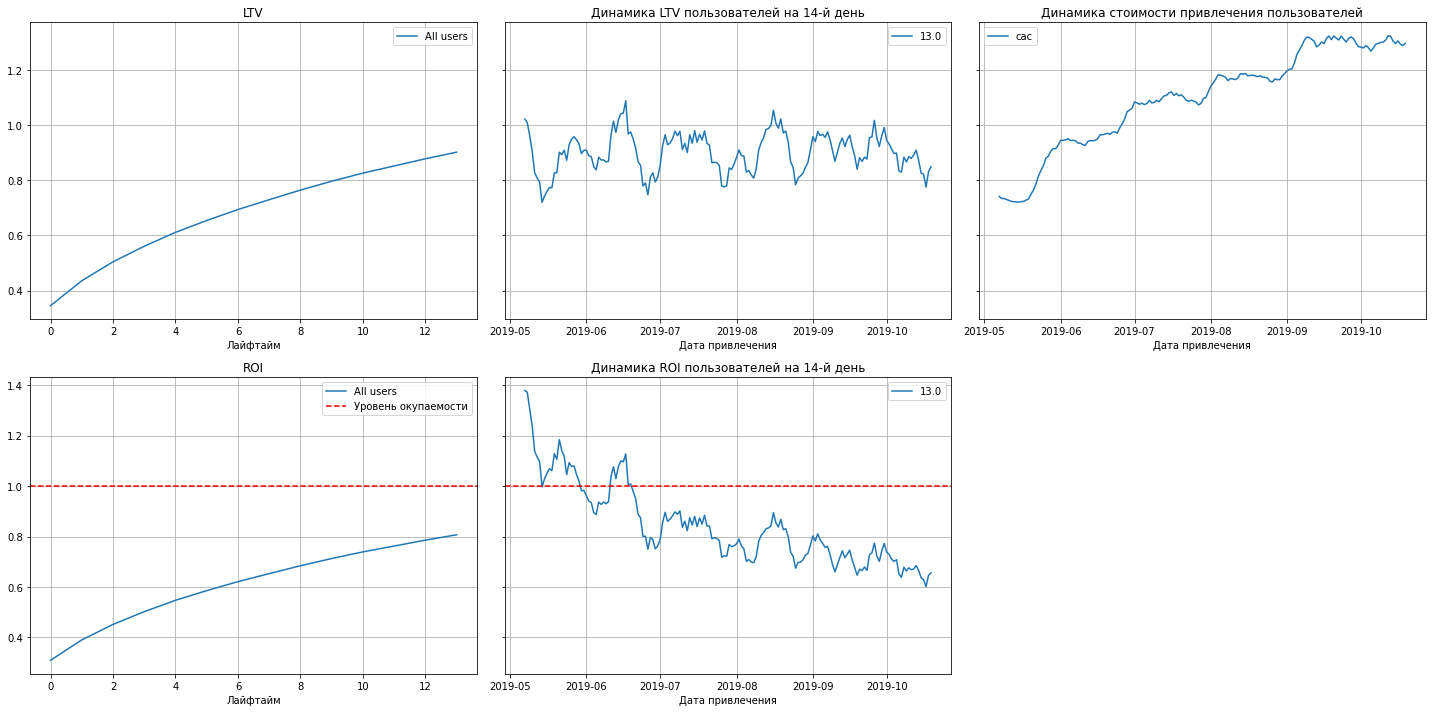

In [32]:
observation_date = datetime(2019, 11, 1).date() 
horizon_days = 14
profiles = profiles.query('channel != "organic"')
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days
)
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

**По графикам можно сделать такие выводы:
Реклама не окупается. ROI в конце недели — не выше 80%.**

**Показатель САС начинает расти с середины мая с 0,7 до 1,3. Возможно, дело  в увеличении рекламного бюджета.**

**Показатель LTV имеет рост и на 14-й день выручка с одного клиента составляет 0,9. Динамика LTV имеет сезонные перепады, но в целом стабильна. Значит, дело не в ухудшении качества пользователей.**

Проверьте конверсию пользователей и динамику её изменения. То же самое сделайте с удержанием пользователей. Постройте и изучите графики конверсии и удержания.

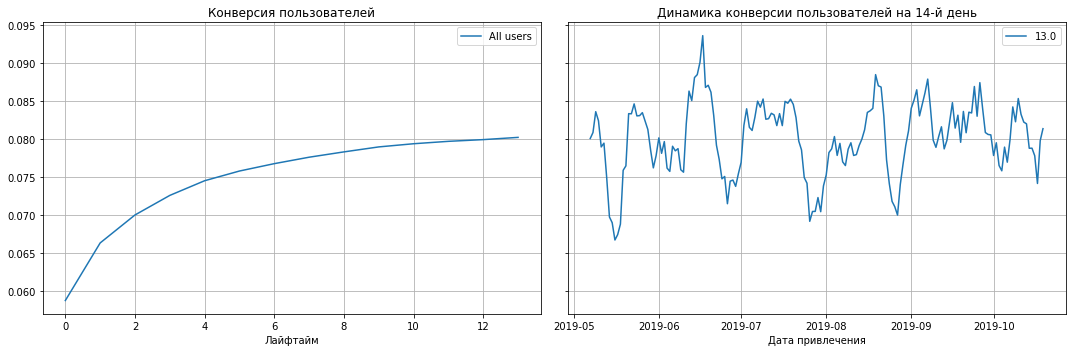

In [33]:


conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

**Судя по графикам, пользователи конвертируются хорошо, хотя на 5-й день конверсия замедляется. из динамики видно, что самая высокая конверсия была 9% в середине июня и самая низкая 7% в середине мая**

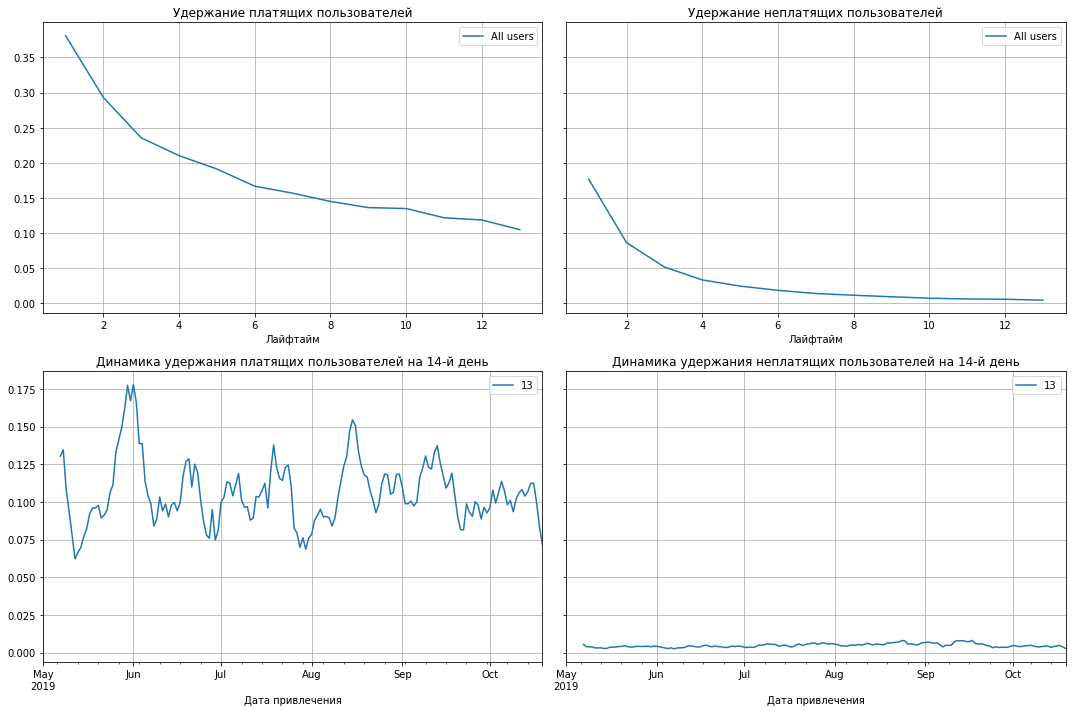

In [34]:

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days
)
plot_retention(retention_grouped, retention_history, horizon_days) 

**Удержание платящих пользователей к 14 - у дню составляет 10%,  для не платящих этот показатель соответствует второму дню. Динамика удержания тоже имеет спад в мае, и максимальный рост приходится на конец мая начала июня.**

Проанализируйте окупаемость рекламы с разбивкой по устройствам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

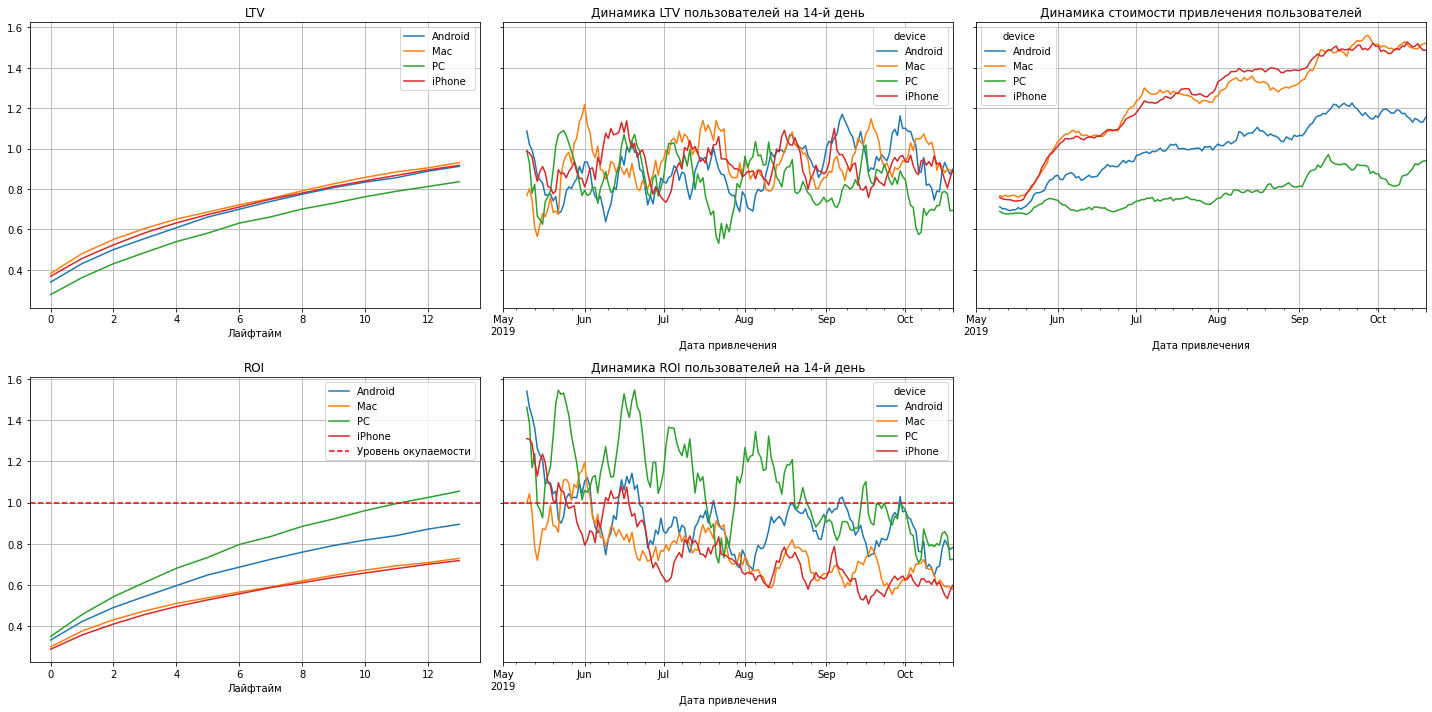

In [35]:
dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=10
) 

**Вот что говорят графики в разбивке по девайсам:**

Реклама не окупается везде кроме РС.

Стоимость привлечения растет у всех дивайсов выше всего iPhone Mac

LTV подвержен сезонности, но стабилен.

Не окупается iPhone Mac,Android это нужно сравнить с каналами привлечения.


**На 14 день LTV в разбивке по устройствам самый маленький показатель у РС. Расходы на привлечение для iPhone Mac самые высокие. Привлечение окупается только у РС, но в последние месяцы динамика окупаемости снижается из-за  увеличения расходов на привлечение.**

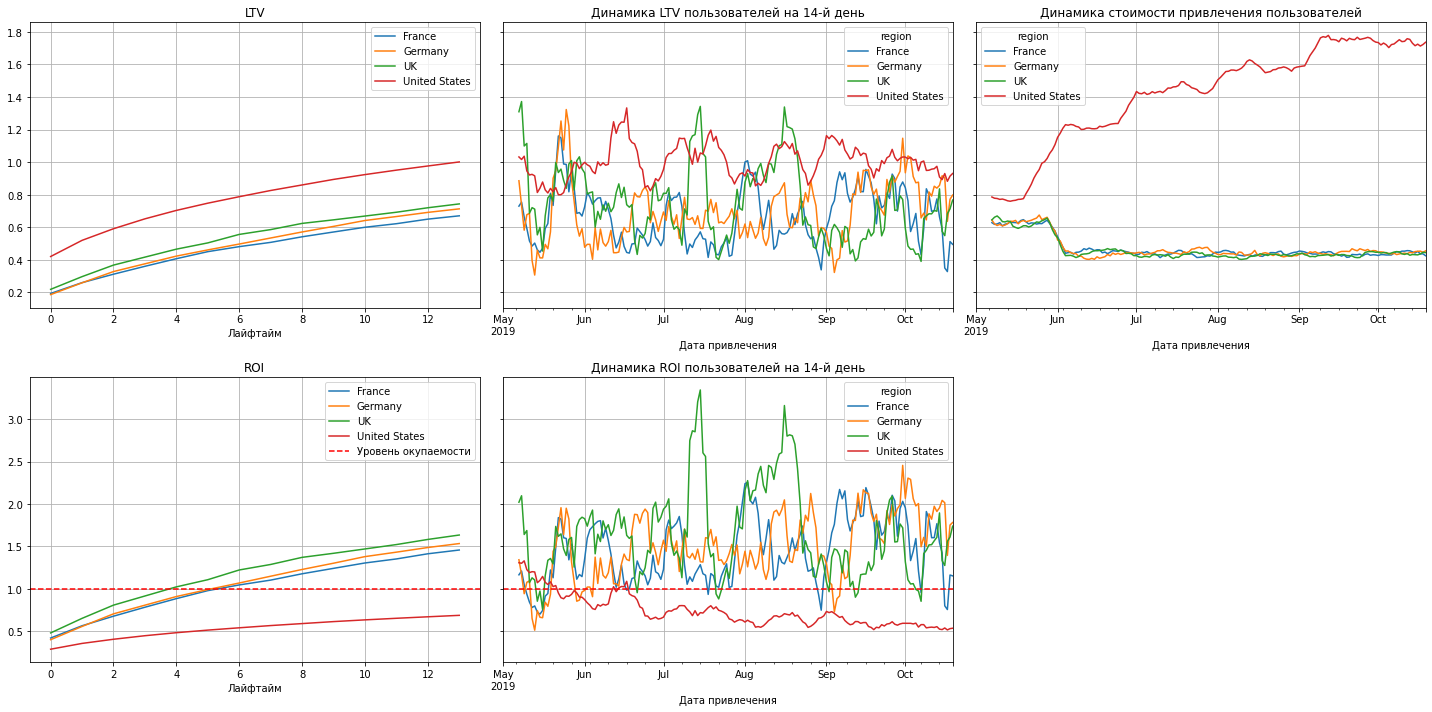

In [36]:
dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)
plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=7
)

**С разбивкой по странам ситуация лучше.**

**Вот что говорят графики:**

**Реклама  окупается везде кроме США.**

**Стоимость привлечения упала для стран Евромы и стала расти для США еще одно потверждение что проблема в увеличении рекламного бюджета**

**LTV выше всего в США, всё так же подвержен сезонности, но стабилен.**

**Хуже всего окупается США.
Восможно, дело  в стране и увеличении рекламного бюджета.**

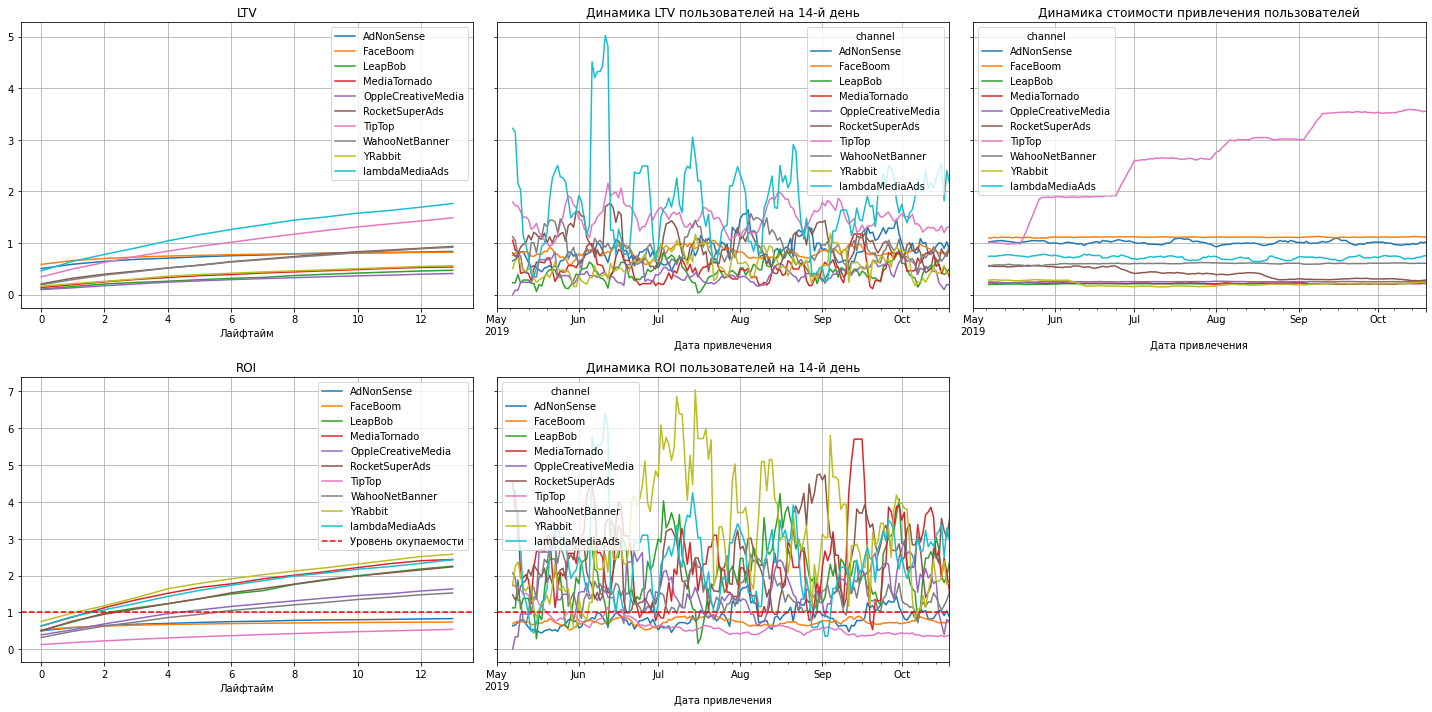

In [37]:
dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)
plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=7
)

**С разбивкой по каналам ситуация следущая.**



**Реклама не окупается на 3-х каналах TipTop,FaceBoom и AdNonSense.**

**Стоимость привлечения растет на канале TipTop на остальных каналах САС стабилен**

**LTV выше всего на канале YRabbit, всё так же подвержен сезонности, но стабилен.**

**Проблема по которой компания последние месяцы терит убытки при огромных вложениях в рекламу канал TipTop**


In [38]:
roi_grouped

,cohort_size,cac,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
channel,,,,,,,,,,,,,,,,
AdNonSense,3702,1.008023,0.501010,0.584460,0.639288,0.678069,0.701069,0.726752,0.748147,0.761519,0.782922,0.796294,0.800573,0.808597,0.820631,0.831337
FaceBoom,27544,1.113419,0.526040,0.593510,0.629343,0.654599,0.671035,0.682914,0.695801,0.704818,0.711685,0.719204,0.724119,0.729488,0.734210,0.737790
LeapBob,8103,0.210000,0.509752,0.741436,0.978967,1.120908,1.236450,1.374282,1.498034,1.589535,1.759730,1.877030,1.988470,2.085248,2.179087,2.252399
MediaTornado,4167,0.219035,0.627684,0.874814,1.127410,1.340729,1.516873,1.675432,1.773841,1.910531,2.008962,2.107371,2.216726,2.320602,2.402610,2.436519
OppleCreativeMedia,8139,0.249908,0.389100,0.526504,0.686996,0.826849,0.964769,1.065354,1.161037,1.238564,1.314661,1.388265,1.457448,1.507006,1.580649,1.637075
RocketSuperAds,4251,0.417431,0.497256,0.763336,0.948932,1.092347,1.235204,1.367935,1.531090,1.646391,1.767923,1.892809,1.991795,2.070538,2.152657,2.237019
TipTop,18498,2.757774,0.124575,0.180359,0.226321,0.268272,0.305449,0.339298,0.367570,0.397585,0.424763,0.451627,0.475535,0.497310,0.517679,0.539532
WahooNetBanner,8082,0.601856,0.317853,0.484298,0.629588,0.737309,0.858780,0.946188,1.049868,1.126808,1.205193,1.271878,1.350049,1.411192,1.477881,1.526304
YRabbit,4102,0.217087,0.752238,0.983122,1.179250,1.400049,1.641119,1.786814,1.910094,2.022179,2.123045,2.212703,2.313569,2.414457,2.516446,2.578086


**Лучше всего окупается каналы YRabbit, MediaTornado,lambdaMediaAds уже на 3 день.  Канал RocketSuperAds тоже хорошо окупился.	
Канал TipTop покрывает только 54% вложенных средств. 
FaceBoom и AdNonSense только 74-83%.**

Ответьте на такие вопросы:
Окупается ли реклама, направленная на привлечение пользователей в целом?
Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
Чем могут быть вызваны проблемы окупаемости?
Напишите вывод, опишите возможные причины обнаруженных проблем и промежуточные рекомендации для рекламного отдела.

**В целом реклама направелнная на привлечение пользовтелей не окупается с середины июня. Негативное влияние на окупаемость окзывают каналы TipTop, FaceBoom, AdNonSense. Так как самые затраные на привлечение каналы TipTop, FaceBoom из США, этот регион негативно сказывается на  окупаемости. Сами девайсы напрямую с окупаемостью не свзаны скорее, влияние оказывает регион и выбор канала привлечения.**   

**Рекомендации для рекламного отдела**

**Пересмотреть распределение рекламных средств по каналам привлечения.** 
* В США обратить внимание на канал RocketSuperAds в разбивке по девайсам iPhone(50%),Mac(30%),Android(20%). 
* В станах Европы канал lambdaMediaAds в разбивке по девайсам РС(40%), Android(25%), iPhone(25%)б Mac(10%).
  	

In [39]:
profiles.pivot_table(index='channel', columns = 'region', values='acquisition_cost', aggfunc='sum')

region,France,Germany,UK,United States
channel,,,,
AdNonSense,1376.316788,1229.282545,1305.650668,NaN
FaceBoom,NaN,NaN,NaN,32445.60
LeapBob,628.045578,529.946557,639.607864,NaN
MediaTornado,NaN,NaN,NaN,954.48
OppleCreativeMedia,747.336327,640.733464,763.180209,NaN
RocketSuperAds,NaN,NaN,NaN,1833.00
TipTop,NaN,NaN,NaN,54751.30
WahooNetBanner,1789.137006,1552.972718,1808.890277,NaN
YRabbit,NaN,NaN,NaN,944.22


In [40]:
profiles.pivot_table(index='channel', columns = 'device', values='payer', aggfunc='sum')

device,Android,Mac,PC,iPhone
channel,,,,
AdNonSense,118,39,192,91
FaceBoom,784,886,357,1530
LeapBob,87,27,107,41
MediaTornado,30,44,17,65
OppleCreativeMedia,54,34,93,52
RocketSuperAds,54,97,33,168
TipTop,409,439,203,827
WahooNetBanner,149,40,185,79
YRabbit,40,41,20,64


<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Супер! А вот тут ты как раз здорово дополнила группирвоку по сегментам</div>

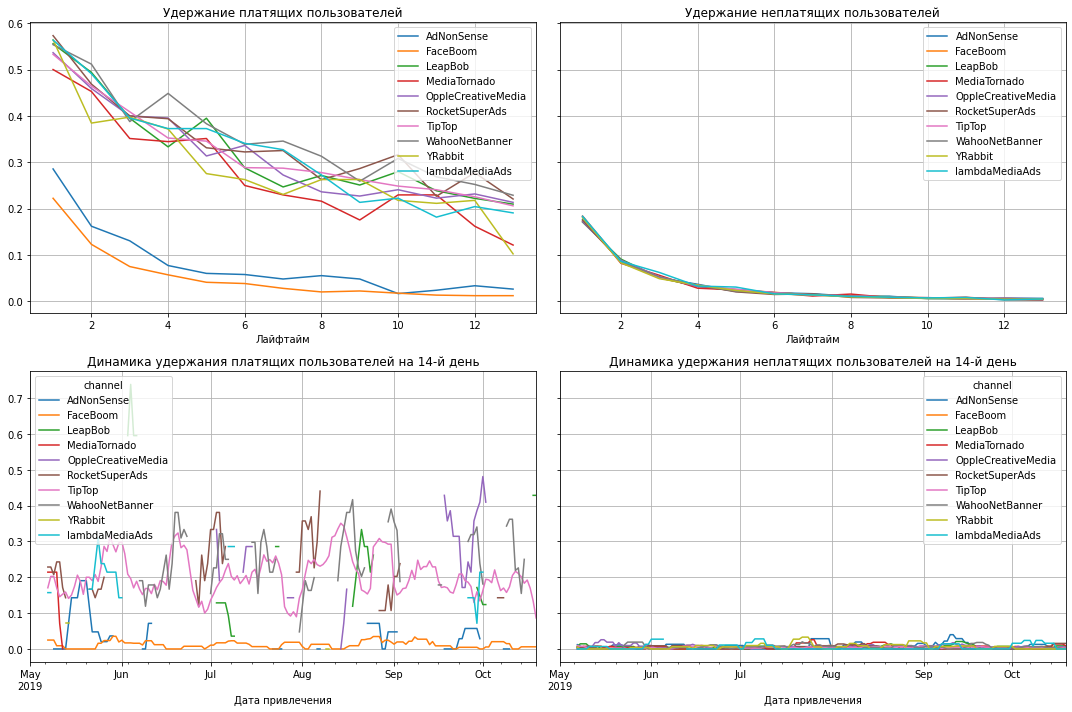

In [41]:
dimensions = ['channel']
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)
plot_retention(retention_grouped, retention_history, horizon_days) 

### Напишите выводы

- Выделите причины неэффективности привлечения пользователей.
- Сформулируйте рекомендации для отдела маркетинга.

**Были проанализировать бизнес показатели развлекательного приложения Procrastinate Pro+, с  1 мая по 27 октября 2019 года. С целью выявления причин, по которым последние несколько месяцев компания терпит убытки, несмотря на огромные вложения в рекламу, и помочь компании выйти в плюс.  Данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года.
Перед проведением исследования были поставлены несколько задач**
1. Выделить причины неэффективности привлечения пользователей.
2. Сформулировать рекомендации для отдела маркетинга.


В результате исследования удалось выяснить следующие причины неэффективности

Неэффективные каналы привлечения. 
1.	TipTop самый неэффективный канал в плане привлечения пользователей из США. 52% от общего бюджета потрачено на привлечение 9,6% платящих пользователей. Притом что канал RocketSuperAds привлекает 7,91% платящих пользователей из США за 1,74% от общих затрат. 
2.	FaceBoom второй из неэффективных каналов по привлечению пользователей из США 31% от общего бюджета на рекламу. Здесь проблема в удержании пользователей, нужно проверить, почему пользователи не удерживаются, возможно, есть технические ошибки.
3. AdNonSense третий из каналов по привлечению пользователей из Европы. Тоже проблема с удержанием, тоже нужно посмотреть на технические ошибки. 
**Рекомендации для отдела маркетинга**

Пересмотреть распределение рекламного бюджета на канале TipTop, можно более эффективно вложить средства в каналы  RocketSuperAds(США), lambdaMediaAds (Европа)
Также провести анализ каналов FaceBoom и AdNonSense на предмет технических ошибок,  нужно установить причины, почему пользователи  плохо удерживаются со второго дня
